# Do-It-Yourself

In [18]:
import pandas as pd

This section is all about you taking charge of the steering wheel and choosing your own adventure. For this block, we are going to use what we've learnt [before](lab_B) to take a look at a dataset of casualties in the war in Afghanistan. The data was originally released by Wikileaks, and the version we will use is published by The Guardian.

```{margin}
You can read a bit more about the data at The Guardian's [data blog](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism)
``` 

## Data preparation

Before you can set off on your data journey, the dataset needs to be read, and there's a couple of details we will get out of the way so it is then easier for you to start working.

The data are published on a Google Sheet you can check out at:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

As you will see, each row includes casualties recorded month by month, split by Taliban, Civilians, Afghan forces, and NATO.

To read it into a Python session, we need to slightly modify the URL to access it into:

In [44]:
url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
url

'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1'

Note how we split the url into three lines so it is more readable in narrow screens. The result however, stored in `url`, is the same as one long string.

This allows us to read the data straight into a DataFrame, as we have done in the [previous session](lab_B):

In [61]:
db = pandas.read_csv(url, skiprows=[0, -1], thousands=",")

Note also we use the `skiprows=[0, -1]` to avoid reading the top (`0`) and bottom (`-1`) rows which, if you check on the Google Sheet, involves the title of the table.

Now we are good to go!

In [63]:
db.head()
db.drop(db.index[-1], inplace=True)

## Tasks

Now, the challenge is to put to work what we have learnt in this block. For that, the suggestion is that you carry out an analysis of the Afghan Logs in a similar way as how we looked at population composition in Liverpool. These are of course very different datasets reflecting immensely different realities. Their structure, however, is relatively parallel: both capture counts aggregated by a spatial (neighbourhood) or temporal unit (month), and each count is split by a few categories.

Try to answer the following questions:

- Obtain the minimum number of civilian casualties (in what month was that?)
- How many NATO casualties were registered in August 2008?
````{margin}
```{tip}
You will need to first create a column with total counts
```
````
- What is the month with the most total number of casualties?
- Can you make a plot of the distribution of casualties over time?

In [65]:
db[db['Civilians'] == db['Civilians'].min()]

# Minimum civilian casualties == 2 and it occured in March

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
2,2004.0,March,19.0,2,NaN,2.0,3.0


In [66]:
db[(db['Month'] == 'August') & (db['Year'] == 2008)].groupby(["Month", "Year"]).sum()
# NATO Casualties in August 2008 == 46

,,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
Month,Year,,,,,
August,2008.0,326.0,46,61.0,46.0,46.0


In [68]:
db['Total'] = db.apply(lambda x: x[["Taliban", "Civilians", "Afghan forces","Nato - official figures"]].sum(), axis=1)

In [69]:
db.sort_values(by='Total')
# Month with most casualties is September 2006

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
1,2004.0,February,NaN,7,4.0,5.0,2.0,13.0
13,2005.0,February,14.0,4,NaN,NaN,3.0,21.0
2,2004.0,March,19.0,2,NaN,2.0,3.0,24.0
3,2004.0,April,5.0,3,19.0,NaN,3.0,30.0
11,2004.0,December,15.0,13,7.0,NaN,2.0,37.0
...,...,...,...,...,...,...,...,...
66,2009.0,July,557.0,119,80.0,90.0,76.0,832.0
67,2009.0,August,445.0,206,190.0,64.0,77.0,918.0
68,2009.0,September,614.0,197,133.0,54.0,70.0,1014.0
44,2007.0,September,917.0,64,144.0,20.0,24.0,1149.0


<AxesSubplot:xlabel='Year,Month'>

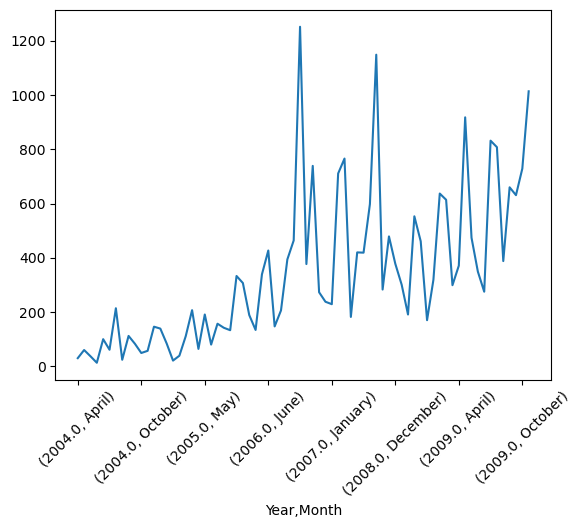

In [75]:
db.groupby(['Year', 'Month'])['Total'].sum().plot(rot=45)